In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

#city_df.head()
#ride_df.head()

# Combine the data into a single dataset - merge on 'city'
city_ride_df = city_df.merge(ride_df, on='city', how='outer')

# Display the data table for preview
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200210e+11


In [3]:
# build a Bubble Plot that showcases the relationship between four key variables: 
#Average Fare ($) Per City, 
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

grouped_df = city_ride_df.groupby('city').agg({'ride_id':'count', 'fare':'mean', 'driver_count':'first', 'type': 'first'})
grouped_df[grouped_df['type']=='Urban']

city_colors = {'Urban': 'red', 'Suburban': 'blue' ,'Rural': 'yellow'}

In [4]:
#test
city_colors["Urban"]

'red'

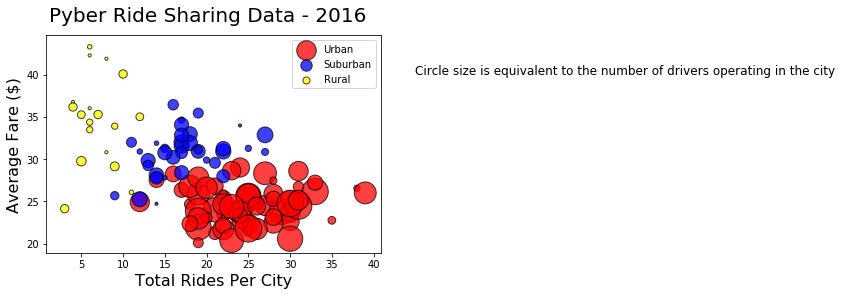

<Figure size 432x288 with 0 Axes>

In [5]:
for city in city_colors.keys():
    subset = grouped_df[grouped_df['type']==city]
    plt.scatter(subset['ride_id'], subset['fare'], marker="o", facecolor=city_colors[city], label=city, edgecolors="black", s=subset['driver_count']*10, alpha=0.75)

# Create a legend   
plt.legend()

# Incorporate a text label regarding circle size
text = "Circle size is equivalent to the number of drivers operating in the city"
heading = "Pyber Ride Sharing Data - 2016"
plt.text(45, 40, text, fontsize=12)
plt.suptitle(heading, fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=16)
plt.xlabel('Total Rides Per City', fontsize=16)

# Save Figure 
plt.figure().savefig('pyber_rides_2016.png')

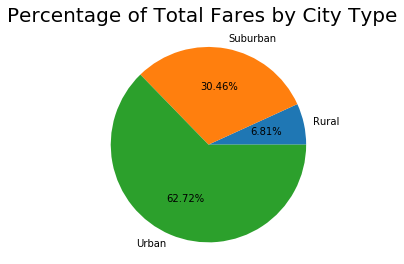

<Figure size 432x288 with 0 Axes>

In [27]:
#Total Fares by City Type
pie_df = city_ride_df.groupby('type').agg({'fare': 'sum'})
pie_df

# Calculate Type Percents
fare_sum = pie_df['fare'].sum()
pie_df['percentage'] = pie_df['fare'] / fare_sum * 100
pie_df

# Build Pie Chart
values = pie_df['percentage']
types = ['Rural', 'Suburban', 'Urban']
pie_heading = 'Percentage of Total Fares by City Type'
plt.pie(values, labels=types, autopct='%1.2f%%')
plt.axis('equal')
plt.suptitle(pie_heading, fontsize=20)

# Save Figure
plt.figure().savefig('CityTypePie.png')

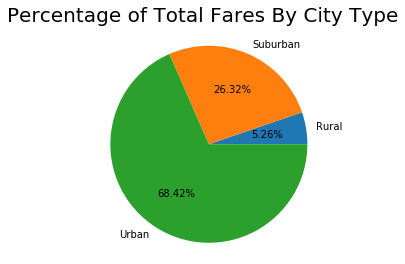

In [28]:
#Total Rides by City Type
#find total rides by counting ride_id
ride_pie_df = city_ride_df.groupby('type').agg({'ride_id': 'count'})
ride_pie_df

# Calculate Ride Percents
ride_pie_df['percentages'] = ride_pie_df['ride_id'] / ride_pie_df['ride_id'].sum() * 100
ride_pie_df\

# Build Pie Chart
size = ride_pie_df['percentages']
pie2_heading = 'Percentage of Total Fares By City Type'

plt.pie(size, labels=types, autopct='%1.2f%%')
plt.axis('equal')
plt.suptitle(pie2_heading, fontsize=20)
# Save Figure
plt.savefig('TotalFaresPie.png')

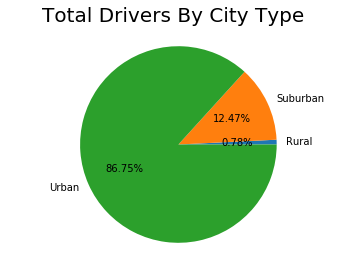

<Figure size 432x288 with 0 Axes>

In [45]:
#Total Drivers by City Type
driver_df = city_ride_df.groupby('type').agg({'driver_count':'sum'})
driver_df
# Calculate Driver Percents
driver_df['percentages'] = driver_df['driver_count'] / driver_df['driver_count'].sum() * 100
driver_df

# Build Pie Charts
size = driver_df['percentages']
pie3_heading = 'Total Drivers By City Type'

plt.pie(size, labels=types, autopct='%1.2f%%')
plt.axis('equal')
plt.suptitle(pie3_heading, fontsize=20)
# Save Figure
plt.figure().savefig('DriversByTypePie.png')